<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521720---Truong-Y-Nhi/LSTM_DELL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# 2. Đọc file csv và gắn index với giá Close
df = pd.read_csv('/content/DELL.csv')
df1=df.reset_index()['Close']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 10s 263ms/step - loss: 0.0515 - val_loss: 0.0473
Epoch 2/100
14/14 [==============================] - 2s 172ms/step - loss: 0.0091 - val_loss: 0.0075
Epoch 3/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0033 - val_loss: 0.0130
Epoch 4/100
14/14 [==============================] - 4s 260ms/step - loss: 0.0023 - val_loss: 0.0142
Epoch 5/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0022 - val_loss: 0.0109
Epoch 6/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0021 - val_loss: 0.0087
Epoch 7/100
14/14 [==============================] - 2s 170ms/step - loss: 0.0020 - val_loss: 0.0106
Epoch 8/100
14/14 [==============================] - 2s 171ms/step - loss: 0.0020 - val_loss: 0.0093
Epoch 9/100
14/14 [==============================] - 4s 258ms/step - loss: 0.0019 - val_loss: 0.0084
Epoch 10/100
14/14 [==============================] - 2s 174ms/step - loss: 0.0019 - val_l

In [ ]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

2/2 [==============================] - 0s 25ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs((y_pred_val - yval)))
test_mae = np.mean(np.abs((y_pred - ytest)))
valid_mape = np.mean(np.abs((y_pred_val - yval)/yval))
test_mape = np.mean(np.abs((y_pred - ytest)/ytest))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 39.6015451989041
Testing RMSE: 46.54053870661831
Validation MAE: 39.53627355197292
Testing MAE: 46.15837622370948
Validation MAPE: 71.86419352954861
Testing MAPE: 69.366961554476


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):

    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.6191764]
101
1 day input [0.60335921 0.59143825 0.59815734 0.58948764 0.61202891 0.6115954
 0.58623644 0.53638543 0.53356774 0.52814915 0.52706546 0.53075006
 0.53118354 0.53075006 0.53703564 0.52294726 0.54592213 0.5545919
 0.56933048 0.57019739 0.56868019 0.60227543 0.59924104 0.60379272
 0.56651277 0.54830631 0.5537249  0.55047372 0.550257   0.53811934
 0.55545881 0.57236487 0.56261139 0.56109418 0.57128118 0.55654259
 0.55004022 0.5632616  0.57648298 0.60227543 0.59837413 0.57063088
 0.59295554 0.58970434 0.59403923 0.6087778  0.62351639 0.61549681
 0.61051171 0.6087778  0.60357593 0.59078804 0.58905413 0.59382245
 0.58471926 0.57149788 0.56369508 0.55936021 0.55350811 0.54527192
 0.52966636 0.50647479 0.52316405 0.5021399  0.47873163 0.47548046
 0.49672131 0.49585431 0.50755849 0.48956881 0.51839567 0.53140035
 0.50820879 0.50257341 0.49303671 0.50625809 0.51319387 0.53075006
 0.54678913 0.55437511 0.57084767 0.56868019 0.56716298 0.55480862
 0.58081785 0.58450245 0.59035455 0.

Validation RMSE: 39.6015451989041
Testing RMSE: 46.54053870661831
Validation MAE: 39.53627355197292
Testing MAE: 46.15837622370948
Validation MAPE: 71.86419352954861
Testing MAPE: 69.366961554476


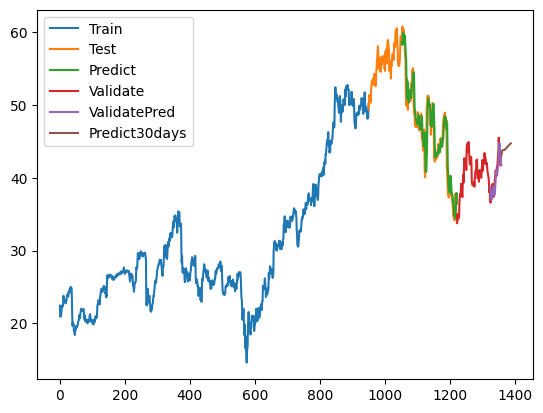

In [ ]:
# 14.Vẽ hình
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()